# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics, model_selection, linear_model

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
X = df.drop(columns='price')
y = df['price']

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [6]:
regressor = linear_model.LinearRegression()

In [7]:
regressor.fit(X_train[['bathrooms']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
y_pred = regressor.predict(X_test[['bathrooms']])

Text(0.5,1,'Training Set w/ Line of Best Fit')

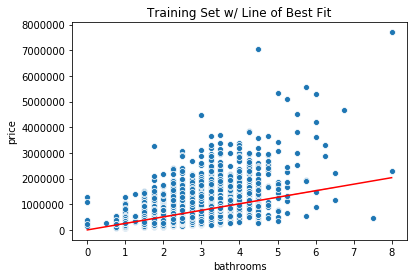

In [9]:
sns.scatterplot(X_train['bathrooms'], y_train)
sns.lineplot(X_train['bathrooms'], regressor.predict(X_train[['bathrooms']]), color='red')

plt.title("Training Set w/ Line of Best Fit")

Text(0.5,1,'Test Set w/ Line of Best Fit')

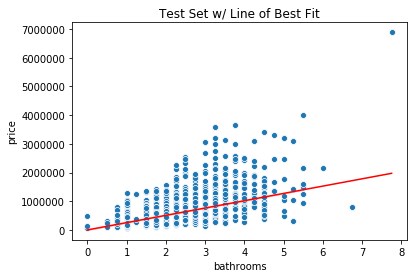

In [10]:
sns.scatterplot(X_test['bathrooms'], y_test)
sns.lineplot(X_test['bathrooms'], y_pred, color='red')

plt.title("Test Set w/ Line of Best Fit")

In [11]:
metrics.mean_squared_error(y_test, y_pred)

88795585693.440231

In [12]:
metrics.r2_score(y_test, y_pred)

0.27918204789079826

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [6]:
regressor = linear_model.LinearRegression()

In [7]:
regressor.fit(X_train[['sqft_lot', 'bathrooms']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
y_pred = regressor.predict(X_test[['sqft_lot', 'bathrooms']])

In [9]:
SQFT, BATHROOMS = np.meshgrid(X_test['sqft_lot'].values, X_test['bathrooms'].values)
PREDS = regressor.coef_[0]*SQFT + regressor.coef_[1]*BATHROOMS

In [10]:
PREDS[:200].shape, SQFT[:200].shape, BATHROOMS[:200].shape

((200, 5404), (200, 5404), (200, 5404))

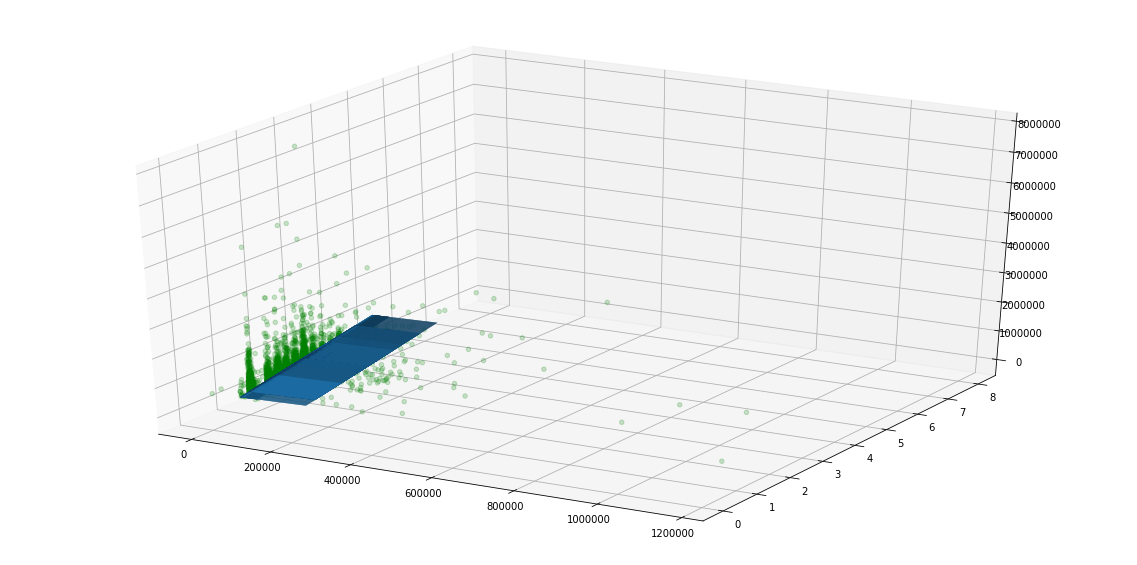

In [17]:
# NOTE: This is very slow, matplotlib crashes when you start plotting above a certain limit
# as it seems to hit swap space - on my computer - and for the obvious reasons starts to
# slow down dramatically

fig = plt.figure(figsize=(20, 10))
ax = fig.gca(projection='3d')

# matplotlib - or the underlying python - seems to allocate memory premptively to ensure
# there's enough space to hold the data, if you don't specify the size it will allocate
# more than necessary and hence take quite a long time as mentioned above, the solution
# is to plot one less than the actual size of the data at hand to minimize the memory used 
size = 5403

ax.plot_surface(SQFT[:size], BATHROOMS[:size], PREDS[:size], alpha=0.4)
ax.scatter(X_test['sqft_lot'].values[:size], X_test['bathrooms'].values[:size], y_train[:size], c='green', alpha=0.2)

plt.show()

In [12]:
metrics.mean_squared_error(y_test, y_pred)

97803717138.298813

In [13]:
metrics.r2_score(y_test, y_pred)

0.27273934121502652

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [54]:
def OLS(X, y):
    return np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y)) 

In [55]:
weights = OLS(X_train.select_dtypes(np.number).values, y_train.values)

Text(0.5,0,'Weight')

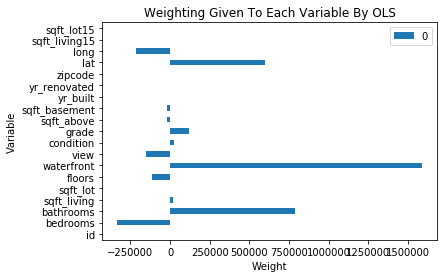

In [80]:
pd.DataFrame(weights, index=X.select_dtypes(np.number).columns).plot.barh()

plt.title("Weighting Given To Each Variable By OLS")
plt.ylabel("Variable")
plt.xlabel("Weight")

In [58]:
y_pred = X_test.select_dtypes(np.number).apply(lambda row: row.values.dot(weights), axis=1)

In [64]:
# Root Mean Square Error
rmse = np.sqrt(((y_pred - y_test)**2).mean())
rmse

776891.79127387516

In [68]:
total_sum_of_squares = ((y_pred - y_pred.mean())**2).mean()
residual_sum_of_squares = ((y_pred - y_test)**2).mean()
r_squared = 1 - (residual_sum_of_squares/total_sum_of_squares)
r_squared

-0.55855871504382471

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
